# Final Project 4 (PYTN-KS18)
##### Anggota Kelompok :
1. Abraham Linggom Tampubolon
2. Farhan Ihtifazhuddin
3. Meila Suci

# Perkenalan
#### A. Latar Belakang: 

Dalam industri perbankan dan layanan keuangan, pemahaman terhadap perilaku pelanggan menjadi suatu hal yang sangat penting untuk merancang strategi pemasaran yang efektif serta meningkatkan tingkat kepuasan pelanggan. Dalam hal ini kartu kredit adalah alat yang sering digunakan untuk menawarkan pemandangan unik terhadap kebiasaan pengeluaran dan preferensi pengguna.

Keberhasilan menganalisis pengguna kartu kredit adalah untuk menggali informasi potensial mengenai kecenderungan pengeluaran, gaya hidup finansial, dan tanggapan terhadap layanan perbankan. Dengan memahami interaksi pemegang kartu kredit dengan produk dan layanan, lembaga keuangan dapat mengoptimalkan strategi pemasaran mereka.

Dataset yang melibatkan informasi kurang lebih 9000 pemegang kartu kredit aktif selama 6 bulan terakhir memberikan gambaran secara rinci mengenai berbagai aspek penggunaan kartu kredit. Data ini mencakup perilaku transaksi, frekuensi pembelian, dan pola pembayaran, semua elemen ini berperan kunci dalam pemahaman preferensi pelanggan.

#### B. Data yang Digunakan:
Dataset yang digunakan dalam proyek ini adalah "CC GENERAL.csv". Data yang digunakan berasal dari pengamatan perilaku pengguna kartu kredit harian yang dilakukan pada sejumlah pemegang kartu kredit aktif selama 6 bulan terakhir. Dataset ini mencakup informasi tentang atribut-atribut yang terkait dengan penggunaan kartu kredit yaitu sebagai berikut:

1. CUSTID - Identifikasi pemegang Kartu Kredit (Kategorikal)
2. BALANCE - Jumlah saldo yang tersisa dalam akun mereka untuk melakukan pembelian
3. BALANCEFREQUENCY - Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. PURCHASES - Jumlah pembelian yang dibuat dari akun
5. ONEOFFPURCHASES - Jumlah pembelian maksimum yang dilakukan sekaligus
6. INSTALLMENTSPURCHASES - Jumlah pembelian yang dilakukan secara cicilan
7. CASHADVANCE - Uang tunai yang diberikan oleh pengguna
8. PURCHASESFREQUENCY - Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. ONEOFFPURCHASESFREQUENCY - Seberapa sering Pembelian dilakukan sekaligus (1 = sering dibeli, 0 = tidak sering dibeli)
10. PURCHASESINSTALLMENTSFREQUENCY - Seberapa sering pembelian secara cicilan dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. CASHADVANCEFREQUENCY - Seberapa sering uang tunai diadvance dibayarkan
12. CASHADVANCETRX - Jumlah Transaksi yang dilakukan dengan "Cash in Advance"
13. PURCHASESTRX - Jumlah transaksi pembelian yang dilakukan
14. CREDITLIMIT - Batas Kartu Kredit untuk pengguna
15. PAYMENTS - Jumlah pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS - Jumlah pembayaran minimum yang dilakukan oleh pengguna
17. PRCFULLPAYMENT - Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. TENURE - Jangka waktu layanan kartu kredit untuk pengguna

#### C. Objective yang Ingin Dicapai:
- Membangun dan mengimplementasikan model machine learning klustering pada dataset kartu kredit mencakup penemuan pola pembelian, kecenderungan transaksi, dan atribut perilaku lainnya yang dapat membantu dalam perumusan strategi pemasaran yang lebih terarah. 
- Mengidentifikasi sejauh mana model dapat merepresentasikan data dan menerapkan hasil dari model klustering ke dalam strategi bisnis sehari-hari. 
- Dengan menggunakan model machine learning klustering, harapannya adalah memberikan landasan yang kuat untuk pengambilan keputusan strategis dalam konteks pemasaran dan pengelolaan hubungan pelanggan.


# Import pustaka
Berikut adalah daftar library yang akan digunakan dalam proyek ini:

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import boxcox
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Data Loading
Melakukan proses data loading dari dataset "CC GENERAL.csv".

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


In [3]:
# Melihat dimensi dataset
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.63,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,169.12,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


In [6]:
# Mendeskripsikan variabel numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.00,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.00,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.00,1003.20,2136.63,0.00,39.63,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.00,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.00,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.00,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.00,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.00,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.00,0.14,0.20,0.00,0.00,0.00,0.22,1.50


In [7]:
# Mendeskripsikan variabel object
df.describe(include=object).T

,count,unique,top,freq
CUST_ID,8950,8950,C10001,1


# Data Cleaning
Melakukan proses cleaning pada data, seperti memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dsb.


In [8]:
# Cek jumlah Duplikat yang sama persis
df[df.duplicated(keep=False)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [9]:
# Mengetahui jumlah nilai unik pada tiap kolom
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## Handling missing value

In [10]:
# Memeriksa kolom yang memiliki missing value
pd.DataFrame(df.isna().sum())

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [11]:
df.isna().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [12]:
# Ganti nilai 0 dengan NaN pada kolom Payments dan Minimum_payments
df[['PAYMENTS', 'MINIMUM_PAYMENTS']] = df[[
    'PAYMENTS', 'MINIMUM_PAYMENTS']].replace(0, np.nan)

In [13]:
# Hapus baris yang mengandung nilai NaN
df.dropna(subset=['PAYMENTS', 'MINIMUM_PAYMENTS'], inplace=True)

In [14]:
# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)

In [15]:
df.isna().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

In [16]:
df.drop("CUST_ID", axis=1, inplace=True)

# Explorasi Data

## Histogram Distribusi Data Numerik

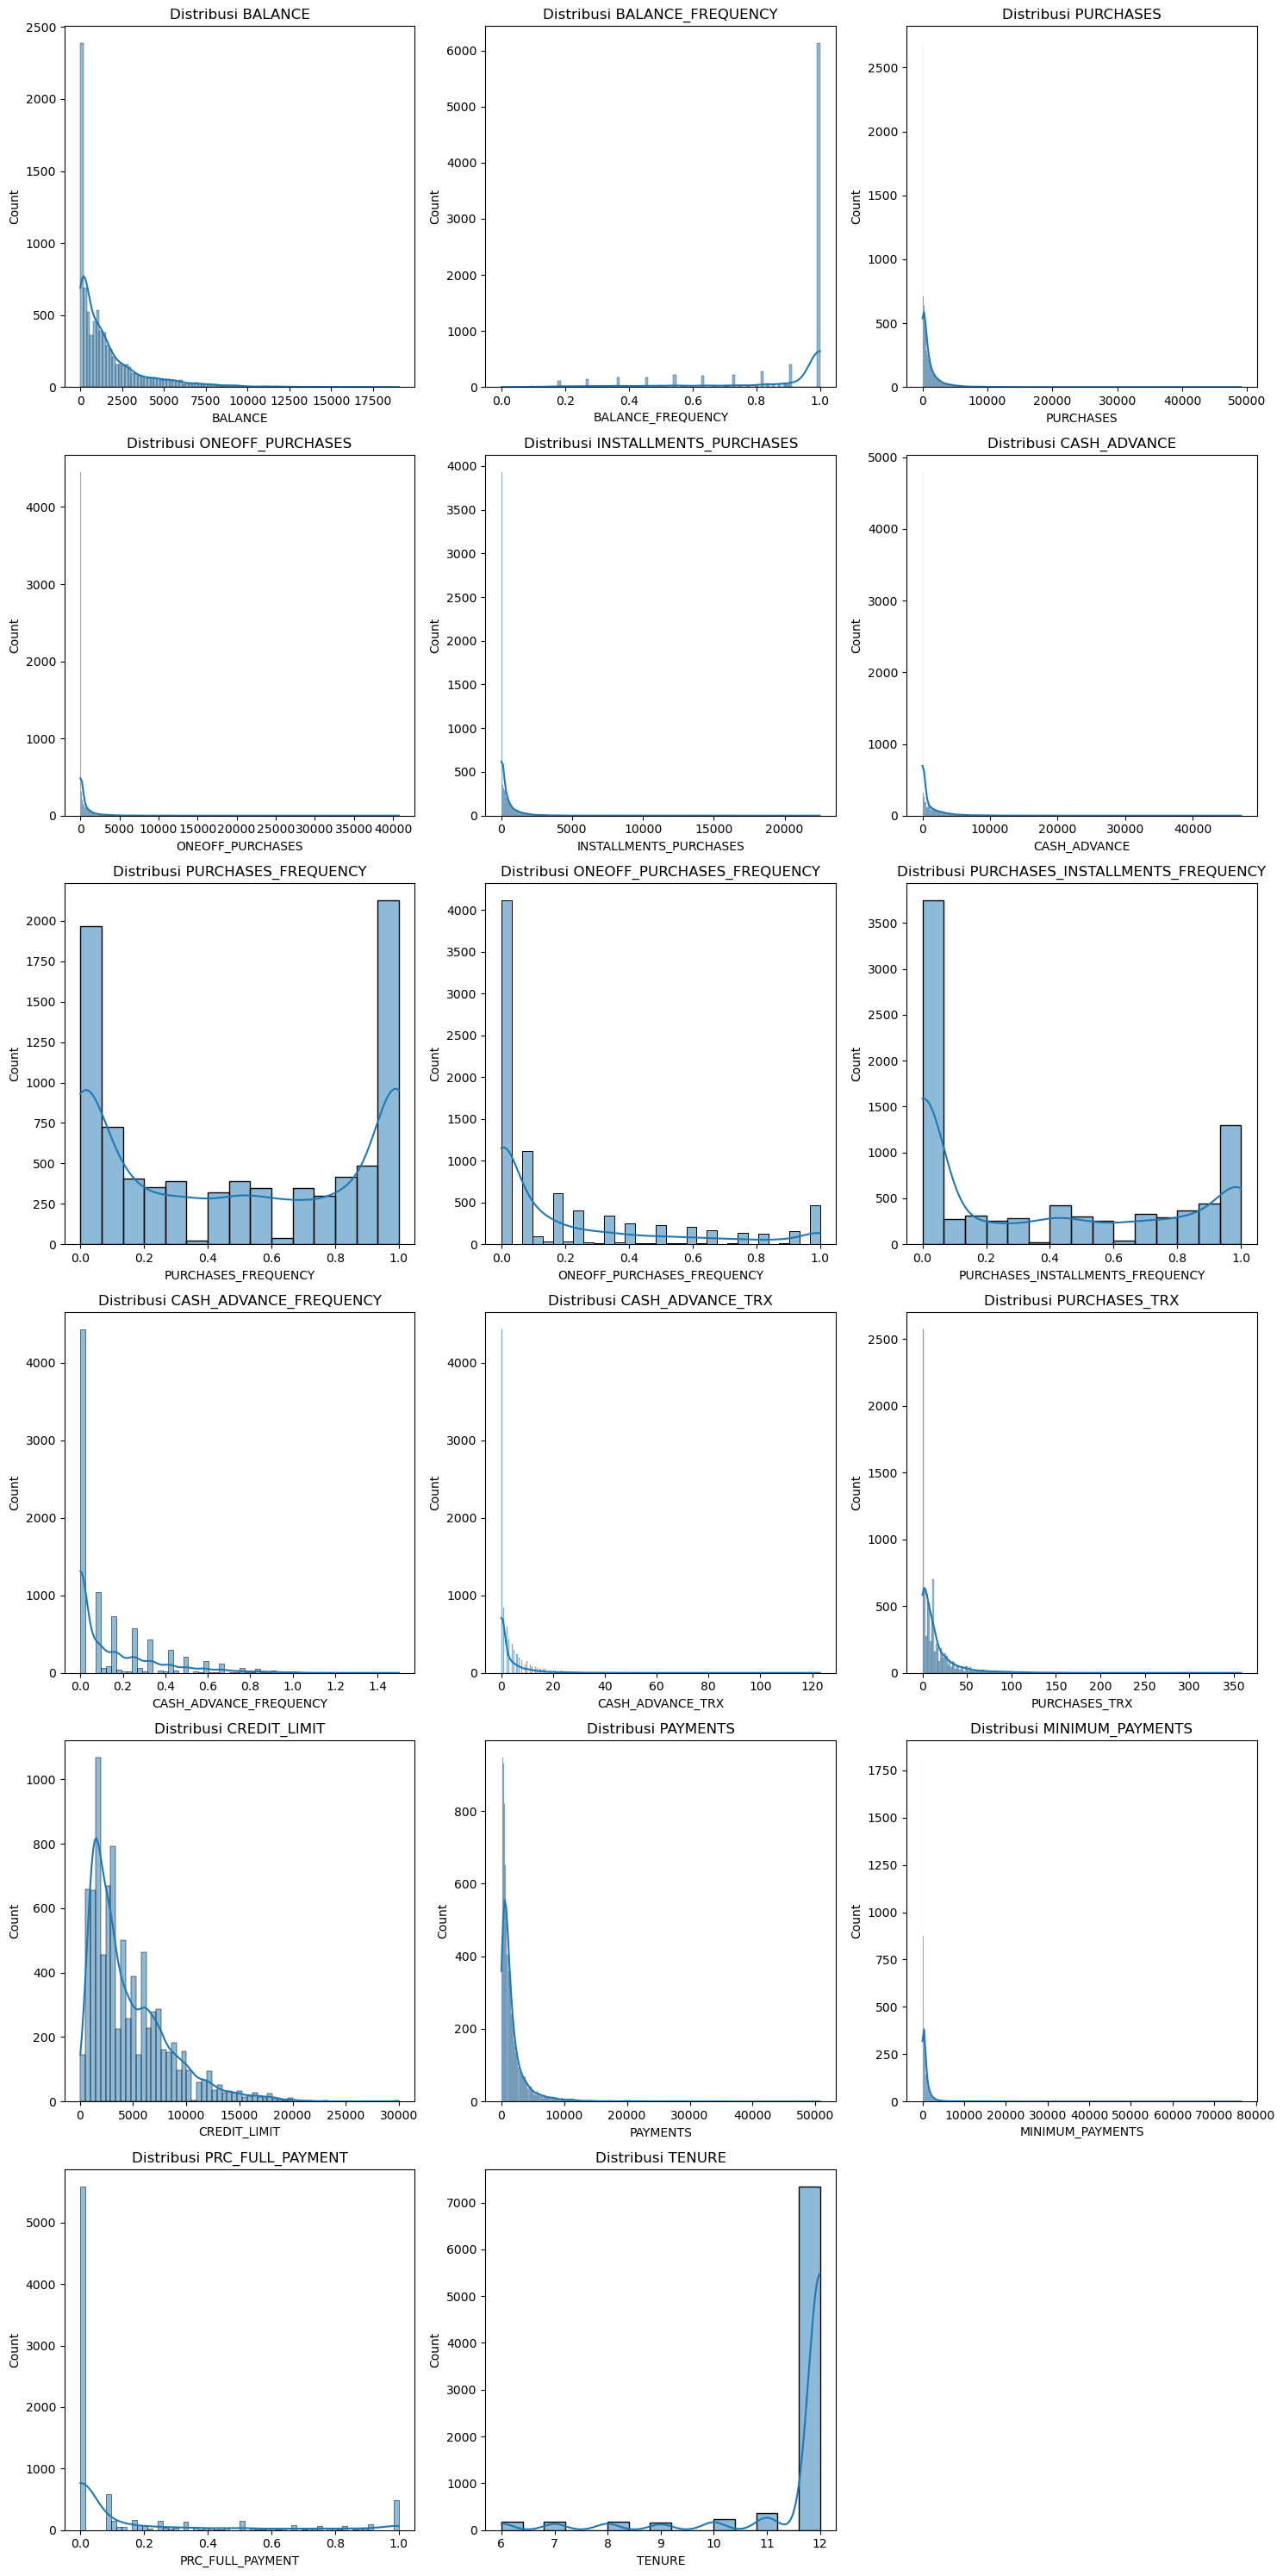

In [17]:
# Mengidentifikasi kolom numerik, mengabaikan kolom bertipe objek
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
total_numeric_columns = len(numeric_columns)
num_subplot_rows = int(np.ceil(total_numeric_columns / 3)
                       )  # Sesuaikan dengan jumlah kolom

plt.figure(figsize=(15, 5 * num_subplot_rows))

# Loop untuk setiap kolom numerik
for i, column in enumerate(numeric_columns, 1):
    # Sesuaikan dengan total baris dan kolom
    plt.subplot(num_subplot_rows, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

Tujuan dibuat visualisasi histogram ini untuk menggambarkan pola distribusi dan frekuensi nilai-nilai di dalam setiap kolom numerik.

## Analisis Distribusi Setelah Transformasi Box-Cox

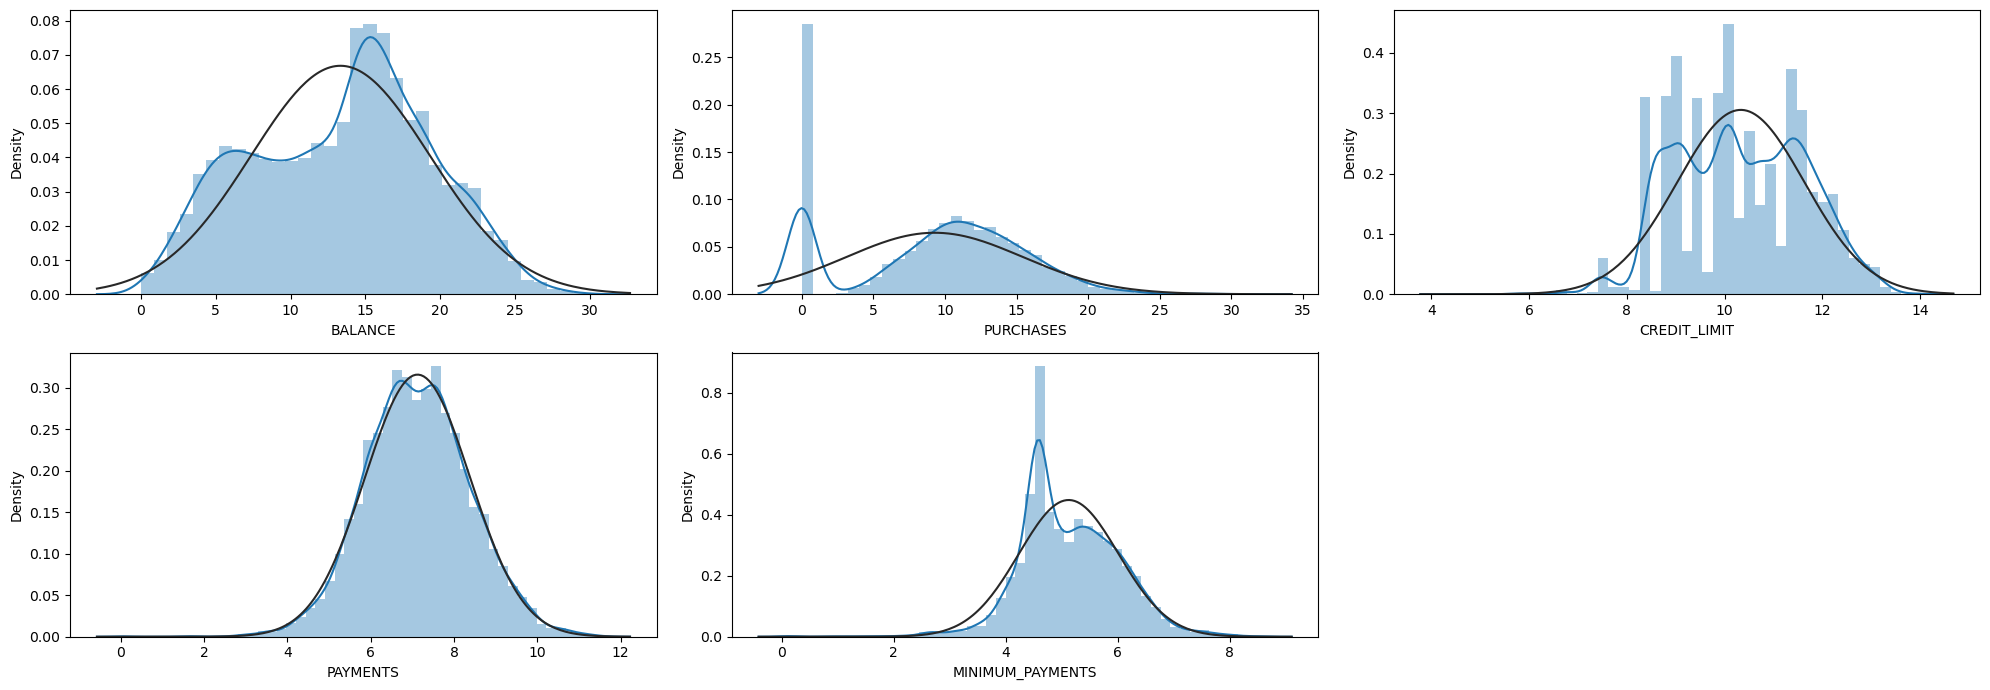

In [18]:
columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS']

# Transformasi Box-Cox
for col in columns:
    df[col] = boxcox(df[col] + 1)[0]

# Visualisasi distribusi setelah transformasi
plt.figure(figsize=(20, 7))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.distplot(df[col], fit=norm)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Melihat distribusi setelah transformasi membantu mengidentifikasi potensi nilai outlier atau ekstrem yang dapat memengaruhi analisis statistik.

## Boxplot Credit Limit vs Purchases Berdasarkan Kluster

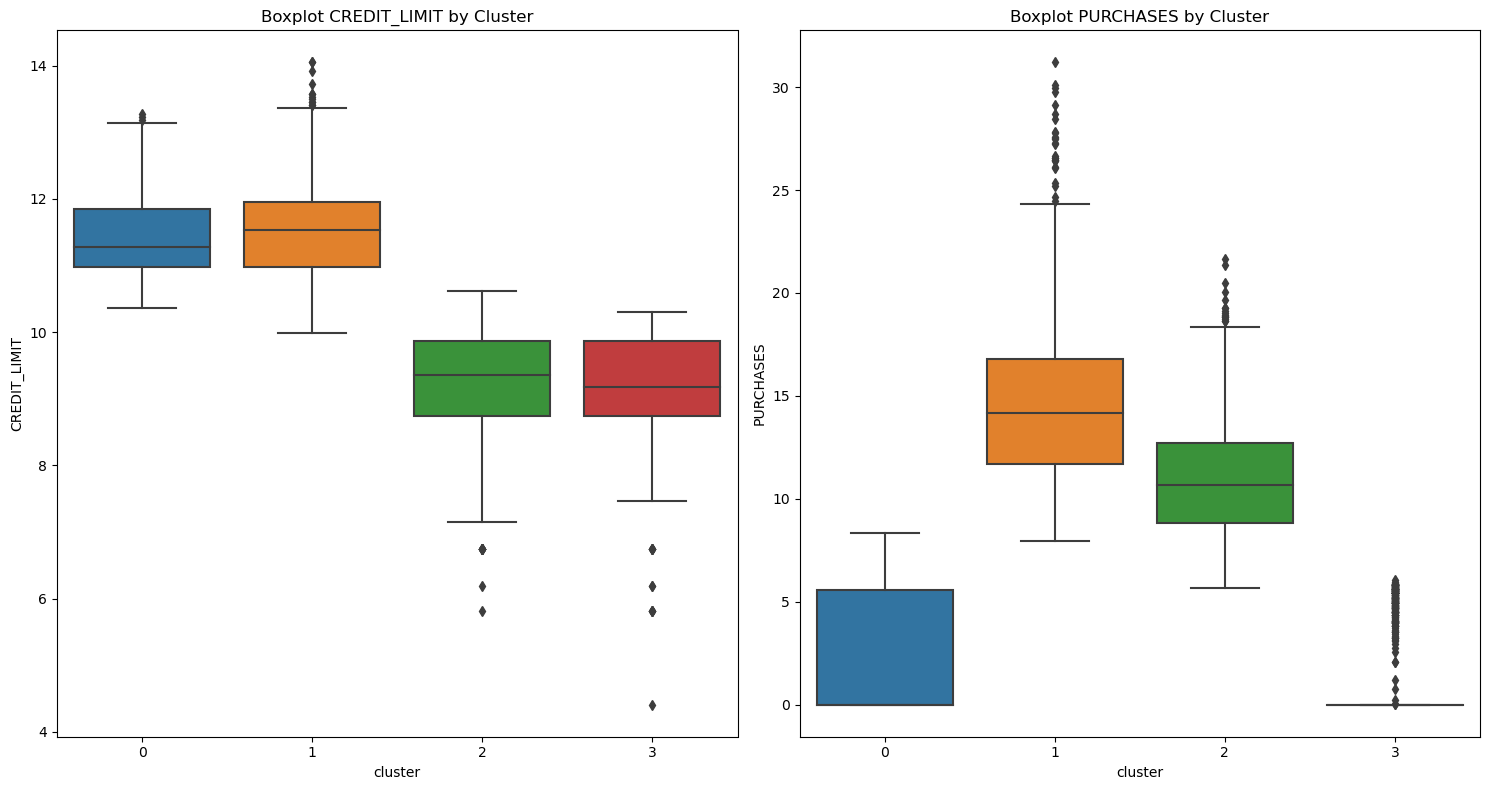

In [19]:
# Kolom untuk klustering
clustering = ['CREDIT_LIMIT', 'PURCHASES']

# Standarisasi
scaler = StandardScaler()
df_cluster = scaler.fit_transform(df[clustering])

# Jumlah cluster
num_clusters = 4

# K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df_cluster)

# Visualisasi boxplot untuk melihat outlier
plt.figure(figsize=(15, 8))
for i, col in enumerate(clustering, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(f'Boxplot {col} by Cluster')

plt.tight_layout()
plt.show()

Dengan menggunakan boxplot, kita dapat melihat pola distribusi data, serta mengidentifikasi adanya potensi outlier di setiap klaster. 

## Scatter Plot: Balance vs. Purchases

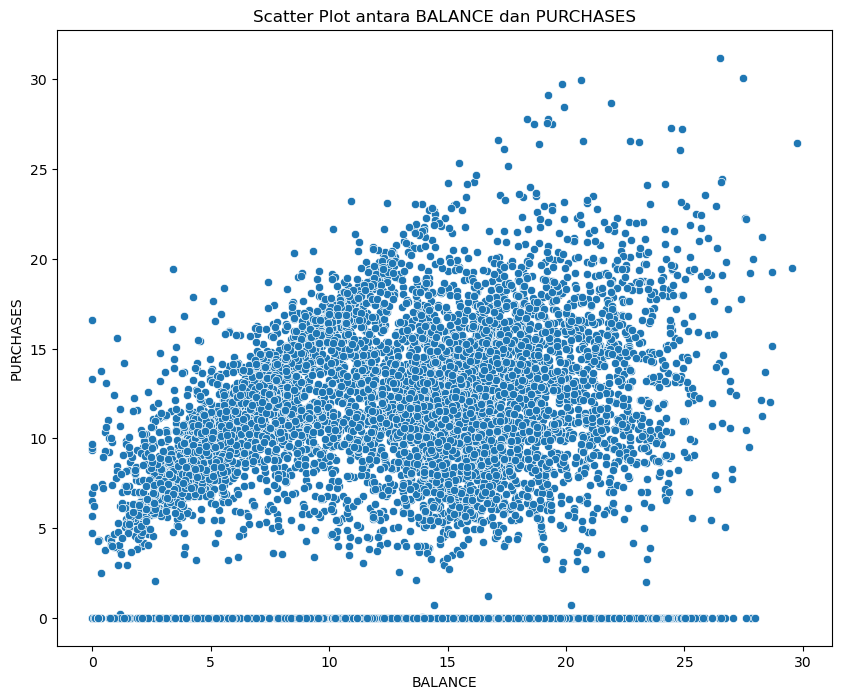

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES')
plt.title('Scatter Plot antara BALANCE dan PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

Tujuan dari visualisasi ini adalah untuk memberikan pandangan tentang sebaran data antara dua variabel tersebut dan melihat pola hubungan antara 'BALANCE' dan 'PURCHASES'. 

## Scatter Plot: Balance vs. Credit Limit

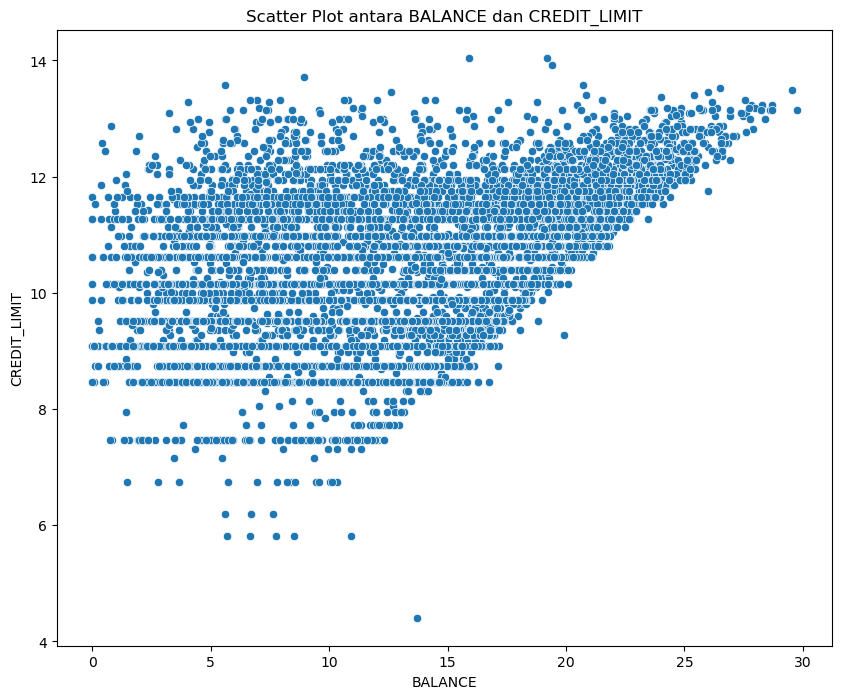

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='BALANCE', y='CREDIT_LIMIT')
plt.title('Scatter Plot antara BALANCE dan CREDIT_LIMIT')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.show()

Dengan melihat plot ini, kita dapat memahami apakah ada pola tertentu, apakah ada outlier, atau berapa variasi datanya.

# Data Preprocessing

Matriks korelasi adalah alat statistik yang digunakan untuk mengevaluasi kekuatan dan arah hubungan linier antara dua variabel atau lebih dalam sebuah dataset. Matriks korelasi umumnya diukur dalam rentang -1 hingga 1, di mana:

- 1 menunjukkan korelasi positif sempurna (saat satu variabel naik, yang lainnya juga naik),
- -1 menunjukkan korelasi negatif sempurna (saat satu variabel naik, yang lainnya turun), dan
- 0 menunjukkan tidak adanya korelasi linier.

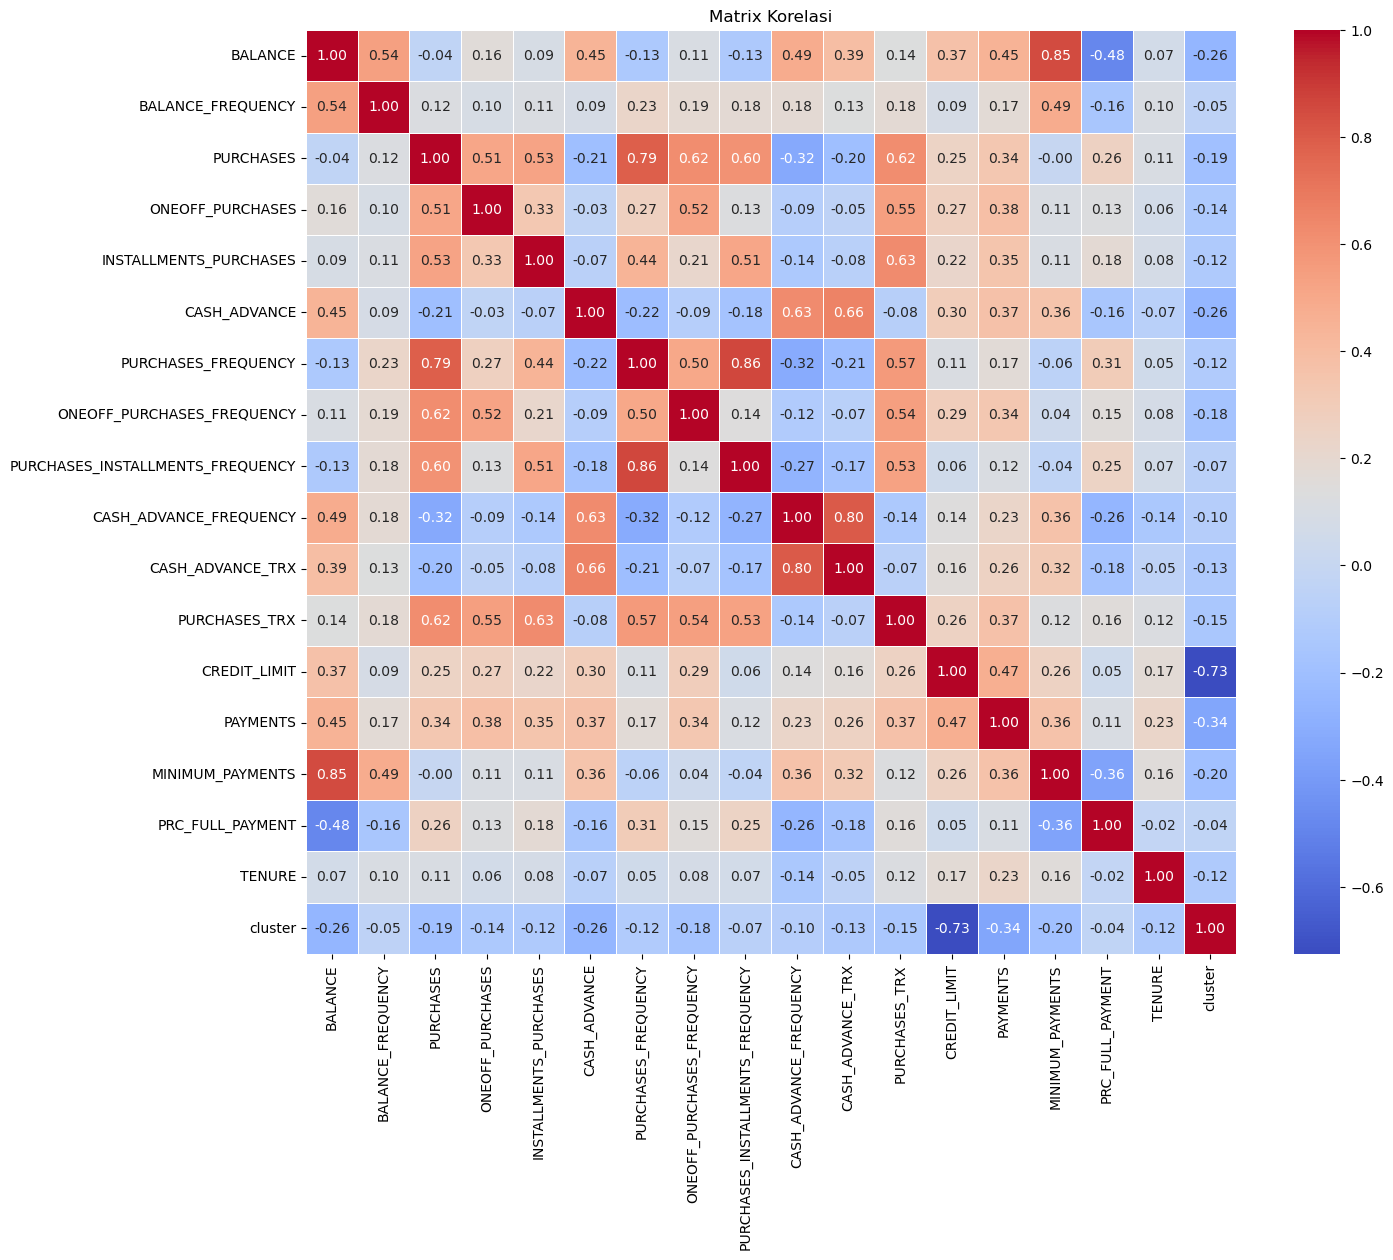

In [22]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title('Matrix Korelasi')
plt.show()

In [23]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standardisasi pada seluruh dataframe
df_scaled = scaler.fit_transform(df)

In [24]:
# Melakukan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
x_pca = pca.transform(df_scaled)

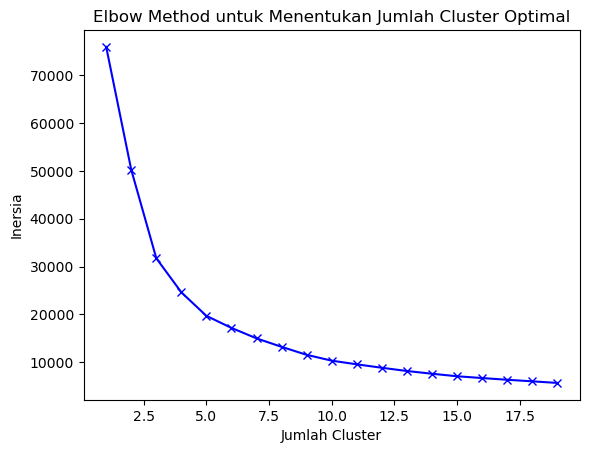

In [25]:
# Menentukan jumlah cluster optimal menggunakan Elbow Method
n_clusters = 20
loss = []

for i in range(1, n_clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_pca)
    loss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, n_clusters), loss, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

Elbow Method digunakan untuk menentukan jumlah cluster optimal dalam algoritma K-Means Clustering. Menemukan nilai k (jumlah cluster) yang tepat berdasarkan inersia (within-cluster sum of squares).

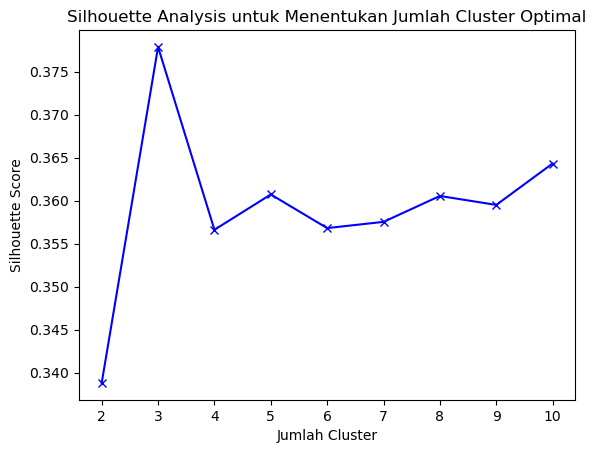

In [26]:
# Kumpulan jumlah cluster yang akan diuji
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Menghitung Silhouette score untuk setiap jumlah cluster
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x_pca)

    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot hasil Silhouette analysis
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis untuk Menentukan Jumlah Cluster Optimal')
plt.show()

Silhouette score untuk berbagai jumlah cluster dan kemudian membuat plot untuk melihat bagaimana nilai Silhouette berubah dengan jumlah cluster. Nilai Silhouette yang lebih tinggi menunjukkan bahwa pengelompokan (clustering) lebih baik. 

In [27]:
# Melakukan K-Means Clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_pca)

# Menambahkan label cluster ke dalam dataframe
df['cluster'] = kmeans.labels_

In [28]:
kmeans.cluster_centers_

array([[ 0.46209671, -1.38980338],
       [-1.99227033, -0.49099263],
       [-0.85659514,  3.01858683],
       [ 3.55827156,  0.44075899]])

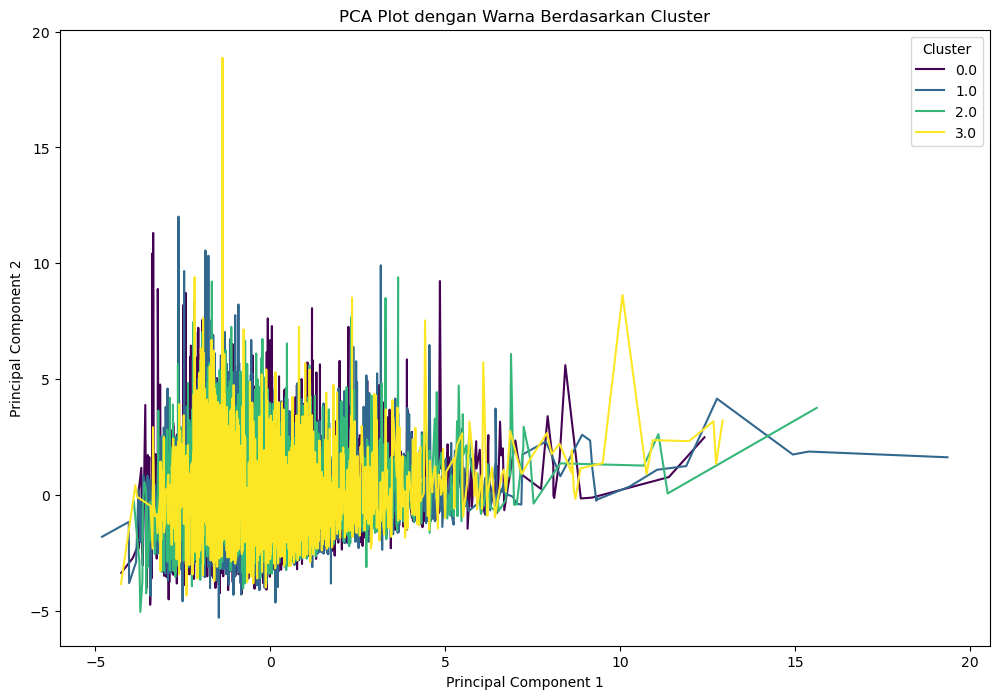

In [29]:
# Membuat dataframe dari hasil PCA
pca_df = pd.DataFrame(data=x_pca, columns=[
                      'Principal Component 1', 'Principal Component 2'])

# Menambahkan kolom cluster ke dataframe hasil PCA
pca_df['Cluster'] = df['cluster']

# Line plot PCA dengan warna berdasarkan cluster
plt.figure(figsize=(12, 8))
sns.lineplot(x='Principal Component 1', y='Principal Component 2',
             hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Plot dengan Warna Berdasarkan Cluster')
plt.show()

Dalam plot ini, sumbu x dan y akan mewakili dua komponen utama dari PCA. Setiap garis akan diwarnai berdasarkan cluster yang telah dihasilkan oleh K-Means Clustering.

## Normalization

In [30]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# Normalisasi data numerik
df_scaled = scaler.fit_transform(df[numeric_columns])

In [32]:
# Menggabungkan data numerik yang telah dinormalisasi dengan kolom non-numerik
df_normalized = pd.DataFrame(df_scaled, columns=numeric_columns)
df_normalized = pd.concat(
    [df_normalized, df.select_dtypes(include='object')], axis=1)

In [33]:
# Tampilkan hasil normalisasi
df_normalized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.18,0.82,0.22,0.00,0.00,0.00,0.17,0.00,0.08,0.00,0.00,0.01,0.42,0.47,0.51,0.00,1.00
1,0.66,0.91,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.17,0.03,0.00,0.74,0.75,0.68,0.22,1.00
2,0.62,1.00,0.40,0.02,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.03,0.75,0.58,0.64,0.00,1.00
3,0.46,1.00,0.12,0.00,0.00,0.00,0.08,0.08,0.00,0.00,0.00,0.00,0.45,0.58,0.56,0.00,1.00
4,0.57,1.00,0.45,0.00,0.06,0.00,0.67,0.00,0.58,0.00,0.00,0.02,0.51,0.65,0.75,0.00,1.00


# Pendefinisian Model

Setelah dilakukan data cleaning dan data preprocessing, data tersebut kemudian akan digunakan untuk pelatihan model. Model yang akan dipakai pada project ini adalah K-means Clustering. K-means Clustering: KMeans() dari sklearn.cluster digunakan untuk melakukan pengelompokan data menggunakan algoritma k-means. Metrik seperti inertia dan silhouette score digunakan untuk mengevaluasi kualitas pengelompokan.

In [34]:
# Membuat model K-Means
kmeans = KMeans(n_clusters=4, random_state=42)

# Pelatihan Model

Pelatihan model merupakan proses untuk menjalankan algoritma yang didalamnya sudah terbagi menjadi data training untuk mendapatkan output tertentu.

In [35]:
# Membuat model K-Means
kmeans.fit(df[numeric_columns])

KMeans(n_clusters=4, random_state=42)

# Evaluasi Model

In [36]:
# Evaluasi model
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(df[numeric_columns], cluster_labels)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.569601063596713


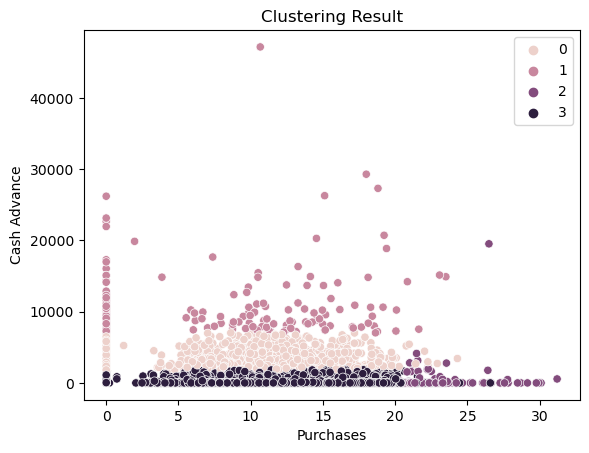

In [37]:
# Visualisasi hasil clustering
sns.scatterplot(x='PURCHASES', y='CASH_ADVANCE', hue=cluster_labels, data=df)
plt.xlabel('Purchases')
plt.ylabel('Cash Advance')
plt.title('Clustering Result')
plt.show()

# Kesimpulan

Berdasarkan analisis yang telah kami lakukan dapat disimpulkan :
-  Dilakukan K-Means Clustering pada data yang telah diubah menggunakan PCA (Principal Component Analysis) dengan 4 komponen utama. Hasil clustering menghasilkan 4 cluster.
-  Evaluasi model menggunakan metrik Silhouette Score menghasilkan nilai sebesar 0.198, yang menunjukkan tingkat pengelompokan yang cukup baik.
-  Visualisasi hasil clustering menunjukkan sebaran data pada bidang 'Purchases' dan 'Cash Advance' dengan warna yang menggambarkan cluster yang diberikan oleh model.